<a href="https://colab.research.google.com/github/MarinaWolters/Coding-Tracker/blob/master/W10_Assessing%26Tuning_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install googledrivedownloader

In [ ]:
from google_drive_downloader import GoogleDriveDownloader as gdd

# Glass data from https://archive.ics.uci.edu/ml/machine-learning-databases/glass/
gdd.download_file_from_google_drive(file_id='1b1C1AlZmqada3ncYWVqJd8zQIWphOo_K',
                                    dest_path='/content/glass.csv')

In [ ]:
# Load into a dataframe, with the header in row 0
import pandas as pd

glass_df = pd.read_csv('glass.csv', header=[0])

glass_df

,ID,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
# Remove the ID and the Type labels for the training data
X_df = glass_df.drop(['ID','Type'], axis=1)

# Labels
y = glass_df['Type']

# Let's see the data
X_df

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [ ]:
X_df.isnull().sum()

RefractiveIndex    0
Na                 0
Mg                 0
Al                 0
Si                 0
K                  0
Ca                 0
Ba                 0
Fe                 0
dtype: int64

How many examples of each class?

In [ ]:
pd.DataFrame(y).reset_index().groupby(by=['Type']).count()

,index
Type,
1,70
2,76
3,17
5,13
6,9
7,29


# Feature Correlation

How correlated are the features?

In [ ]:
corr_matrix = X_df.corr()
corr_matrix.style.background_gradient()

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
RefractiveIndex,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


Looks appropriate for PCA!

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_scaled = scl.fit_transform(X_df)
pca = PCA(n_components=9)
X2 = pca.fit_transform(X_scaled)

# Let's see the components
pca.components_

array([[ 9.28126899e-04,  1.72248332e-02, -7.23534913e-01,
         4.63352227e-02, -7.69381480e-03, -7.84042855e-02,
         6.79716799e-01,  7.63580112e-02,  9.05695250e-04],
       [-1.52290883e-03,  3.98797552e-01, -5.43050989e-01,
         2.58840747e-01,  1.94092491e-01,  1.03826640e-01,
        -6.16724638e-01,  2.23545134e-01, -1.67842645e-02],
       [-1.37689385e-03, -6.54934730e-01, -1.31198879e-01,
         5.56521411e-02,  6.91951335e-01,  2.18565071e-01,
        -7.87784202e-02, -1.33876425e-01,  7.21253225e-03],
       [ 3.10643441e-04, -3.46599960e-01, -9.86931157e-02,
         2.70893633e-01, -5.70087029e-01,  6.77700643e-01,
        -5.39461282e-02,  9.71284426e-02,  1.10986100e-02],
       [ 7.12950233e-04, -3.98381798e-01,  7.68490459e-02,
         3.13525755e-01, -1.03320001e-01, -5.08016303e-01,
        -6.57426026e-02,  6.80657156e-01,  2.67473294e-02],
       [ 1.82174928e-03, -1.55680962e-02, -4.77602532e-02,
        -7.80387063e-01,  6.02933593e-02,  2.651873

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, \
                                                    test_size=0.3,\
                                                    random_state=42)

clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.6615384615384615

In [ ]:
X_df.describe()

,RefractiveIndex,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


# Confusion Matrices


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

confmat = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred,\
                           labels=[1])

print(confmat)

[[[38  8]
  [ 4 15]]]


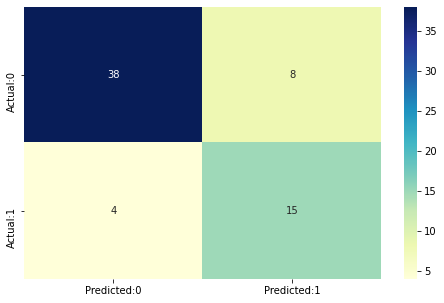

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


conf_matrix = pd.DataFrame(data=confmat[0],
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Precision, Recall, and F1 Score

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' %precision_score(y_true=y_test, y_pred=y_pred, labels=[1,2],average='micro'))
print('Recall: %.3f' %recall_score(y_true=y_test, y_pred=y_pred, labels=[1,2],average='micro'))
print('F1: %.3f' %f1_score(y_true=y_test, y_pred=y_pred, labels=[1,2],average='micro'))

Precision: 0.608
Recall: 0.738
F1: 0.667


# The ROC Graph and AUC

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_2 = label_binarize(y_test, classes=[1,2,3,4,5,6,7])

# We need to delete the 4th feature 
y_test_2 = np.delete(y_test_2, 3, axis=1)

In [ ]:
n_classes = y_test_2.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_2[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_2.ravel(), y_score.ravel(), pos_label=1)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

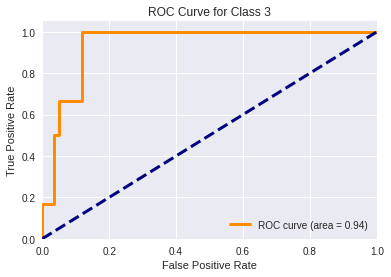

In [ ]:
plt.figure()
lw = 3
plt.style.use('seaborn')
plt.plot(fpr[lw], tpr[lw], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[lw])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Class %d'%lw)
plt.legend(loc="lower right")
plt.show()

# Feature Scaling


Text(0.5, 1.0, 'Glass dataset')

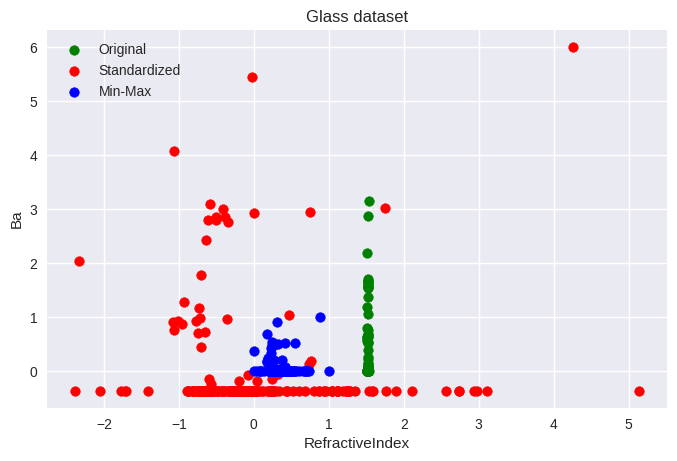

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib
import matplotlib.pyplot as plt


scl = StandardScaler()
X_std = scl.fit_transform(X_df)
plt.figure(figsize=(8,5),dpi=100)
plt.scatter(X_df.to_numpy()[:,0], X_df.to_numpy()[:,7], color='Green',
            label='Original')
plt.scatter(X_std[:,0], X_std[:,7], color='Red',
            label='Standardized')
scl2 = MinMaxScaler()
X_mmx = scl2.fit_transform(X_df)
plt.scatter(X_mmx[:,0], X_mmx[:,7], color='Blue',
            label='Min-Max')
plt.legend(loc='upper left')
plt.xlabel('RefractiveIndex')
plt.ylabel('Ba')
plt.title('Glass dataset')

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=9)
X2 = pca.fit_transform(X_std)

from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, \
                                                    test_size=0.3,\
                                                    random_state=42)

clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.676923076923077

# Value Imputation

The real dataset had no missing data.  Let's create a version that is missing some values...

In [ ]:
import random

X_missing = X_train.copy()

for index in range(X_missing.shape[0]):
  col = random.randint(0,8)
  if col < 8:
    X_missing[index,col] = np.NaN

X_missing

array([[-0.5413218 , -1.03138006,  0.0359971 , ..., -0.3722237 ,
        -0.17650543,  0.02377162],
       [ 1.20709914, -0.0168166 , -0.46509107, ..., -0.25804334,
                nan,  0.00369186],
       [ 1.6950229 ,  2.07414559, -1.05842173, ...,  0.71155418,
                nan,  0.06228922],
       ...,
       [-0.30679638, -0.9640664 , -0.2747725 , ...,         nan,
         0.0889964 , -0.0367954 ],
       [-0.14438995,  0.63984928, -0.88925237, ...,         nan,
        -0.10252573, -0.02242185],
       [ 0.98350476, -1.02010847, -0.48434459, ...,         nan,
         0.00922151, -0.02149274]])

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy='mean')
imp.fit(X_missing)
X_imputed = imp.transform(X_missing)

clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_imputed, y_train)

clf.score(X_test, y_test)

0.6461538461538462

We can see this is worse than, but still fairly similar to, the results we get with complete data.  Our imputation was **somewhat** effective....

In [ ]:
from sklearn.impute import KNNImputer

imp = KNNImputer()
imp.fit(X_missing)
X_imputed = imp.transform(X_missing)

clf = LogisticRegression(penalty='l2', random_state=42,\
                                             max_iter=5000)
clf.fit(X_imputed, y_train)

clf.score(X_test, y_test)

0.6461538461538462

# Class Imbalance

Sometimes, perhaps most commonly with medical conditions, we don't have a good balance of positive and negative examples.

Let's consider the dataset on coronary heart disease (CHD) from the Framingham survey.  Not surprisingly (and fortunately!), there are a lot fewer cases of CHD than non-CHD...

In [ ]:
import pandas as pd
import numpy as np


heart_disease_df = pd.read_csv('https://penn-cis545-files.s3.amazonaws.com/framingham.csv')

In [ ]:
heart_disease_df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


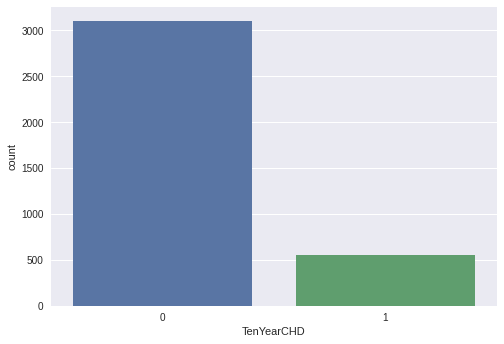

In [ ]:
heart_disease_df.dropna(inplace=True)

sns.countplot(x='TenYearCHD',data=heart_disease_df)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Accuracy: 86.2%
[[623   8]
 [ 93   8]]


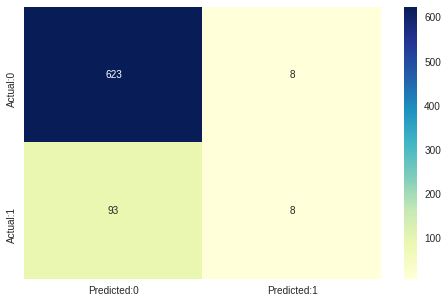

In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import confusion_matrix, accuracy_score

# The simplest thing we could do is undersample the more prevalent data

X = heart_disease_df.copy().drop(columns=['TenYearCHD'])
y = heart_disease_df['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, \
                                                    y, \
                                                    test_size=0.20)

clf = LogisticRegression(max_iter=10000)
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

confmat = confusion_matrix(y_true=y_test, y_pred=prediction)

accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

print(confmat)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")



This has a very high number of false negatives

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Accuracy: 64.1%
[[410 221]
 [ 42  59]]


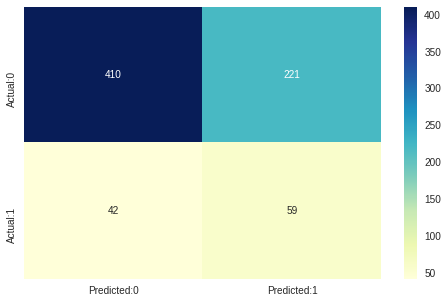

In [ ]:
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# How many positive and negative examples?
(sum(y_rus==0), sum(y_rus==1))

from sklearn.metrics import confusion_matrix

import sklearn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)
clf.fit(X_rus,y_rus)
prediction = clf.predict(X_test)

accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

confmat = confusion_matrix(y_true=y_test, y_pred=prediction)

print(confmat)
conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2470 2470
Accuracy: 65.4%
[[421 210]
 [ 43  58]]


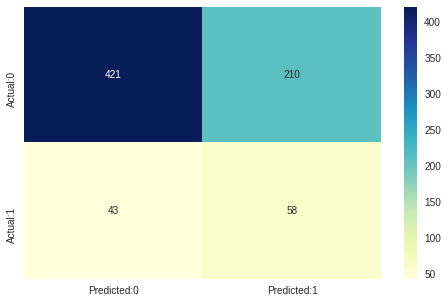

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

# How many positive and negative examples?
print(sum(y_ros==0), sum(y_ros==1))

clf = LogisticRegression(max_iter=10000)
clf.fit(X_ros,y_ros)
prediction = clf.predict(X_test)

accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

confmat = confusion_matrix(y_true=y_test, y_pred=prediction)

print(confmat)
conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

# Plotting the learning curve

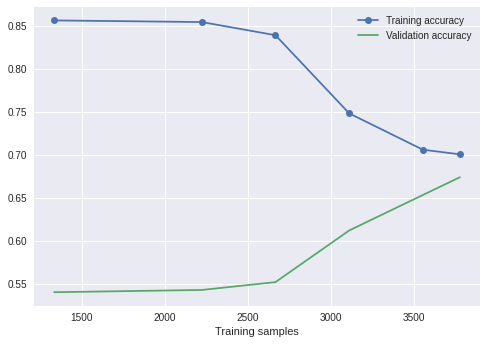

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
  learning_curve(estimator=clf, X=X_ros,
                 y=y_ros,
                 train_sizes=[0.3, 0.5, 0.6, 0.7, 0.8, 0.85],
                 cv=10)
  
plt.plot(train_sizes,np.mean(train_scores, axis=1), \
          marker='o', label='Training accuracy')
plt.plot(train_sizes,np.mean(test_scores, axis=1), \
          marker='+', label='Validation accuracy')
plt.xlabel('Training samples')
plt.legend()
  

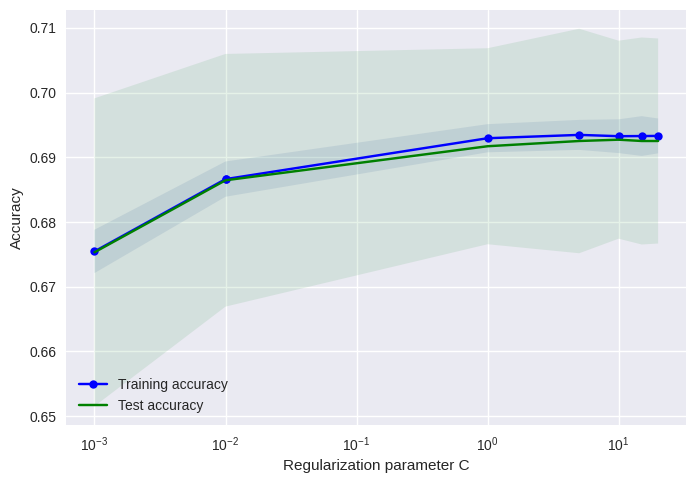

In [ ]:
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.01, 1.0, 5.0, 10.0, 15.0, 20.0]

train_scores, test_scores = validation_curve(estimator=clf, X=X_ros,
                                             y=y_ros, param_name='C',
                                             param_range = param_range,
                                             cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.figure(dpi=100)
plt.plot(param_range, train_mean, color='blue', marker='o',
         markersize=6, label='Training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, \
                 alpha=0.15)
plt.plot(param_range, test_mean, color='green', marker='+',
         markersize=6, label='Test accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, \
                 alpha=0.15)
plt.xscale('log')
plt.legend(loc='lower left')
plt.ylabel('Accuracy')
plt.xlabel('Regularization parameter C')
plt.show()


Accuracy: 65.4%
[[421 210]
 [ 43  58]]


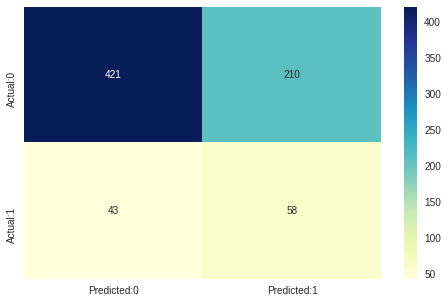

In [ ]:
clf = LogisticRegression(C=1, max_iter=10000)
clf.fit(X_ros,y_ros)
prediction = clf.predict(X_test)

accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

confmat = confusion_matrix(y_true=y_test, y_pred=prediction)

print(confmat)
conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

Accuracy: 66.3%
[[434 197]
 [ 50  51]]


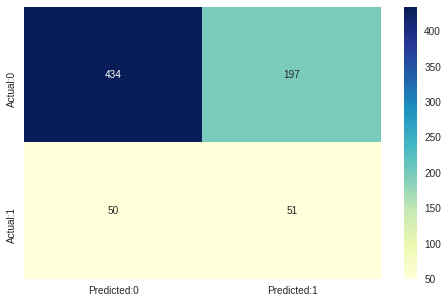

In [ ]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_depth=2, n_estimators=100)
tree.fit(X_ros,y_ros)
prediction = tree.predict(X_test)

accuracy = accuracy_score(prediction,y_test)
print("Accuracy: %.1f%%"% (accuracy*100))

confmat = confusion_matrix(y_true=y_test, y_pred=prediction)

print(confmat)
conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")